loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
{'height': 512, 'width': 512, 'id': 0, 'file_name': 'GF1_WFV2_E123.6_N29.3_20190910_L2A0004239231_2560_1536.png'}
[[375, 435, 395, 458, 'ship'], [337, 385, 362, 409, 'ship'], [154, 222, 177, 236, 'ship']]
{'height': 512, 'width': 512, 'id': 1, 'file_name': 'GF1_WFV3_E122.4_N37.3_20190805_L2A0004161911_10752_8192.png'}
[]
{'height': 512, 'width': 512, 'id': 2, 'file_name': 'GF6_WFV_E133.6_N33.6_20200305_L1A1119973496-2_0_11264.png'}
[]
{'height': 512, 'width': 512, 'id': 3, 'file_name': 'GF6_WFV_E131.8_N31.4_20200918_L1A1120036753-2_11264_11776.png'}
[]
{'height': 512, 'width': 512, 'id': 4, 'file_name': 'GF1_WFV2_E123.6_N29.3_20190910_L2A0004239231_1536_3584.png'}
[[295, 345, 330, 365, 'ship'], [482, 263, 506, 287, 'ship']]
{'height': 512, 'width': 512, 'id': 5, 'file_name': 'GF1_WFV4_E124.0_N33.5_20131122_L1A0000115971_11488_12288.png'}
[]
{'height': 512, 'width': 512, 'id': 6, 'file_name': 'GF1_WFV3_E1

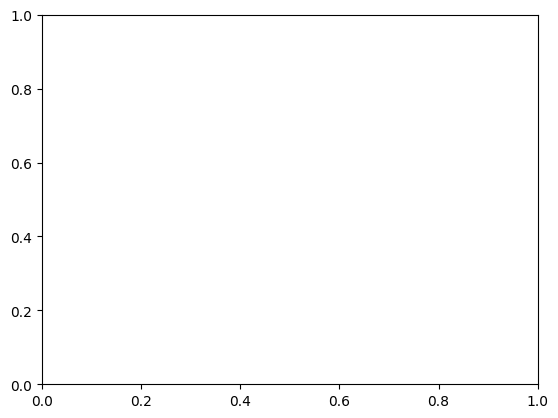

In [2]:
from pycocotools.coco import COCO
import cv2
import os
import numpy as np

img_path = "/data/00.Data/Sentinel-2-Ship/train/imgs"
annFile = "/data/00.Data/Sentinel-2-Ship/instances_train2017.json"


def draw_rectangle(coordinates, image, image_name):
    for coordinate in coordinates:
        left = np.rint(coordinate[0])
        right = np.rint(coordinate[1])
        top = np.rint(coordinate[2])
        bottom = np.rint(coordinate[3])
        cv2.rectangle(image,
                      (int(left), int(right)),
                      (int(top), int(bottom)),
                      (0, 255, 0),
                      2)
        # cv2.putText(image, coordinate[4], (int(left), int(right)), cv2.FONT_HERSHEY_PLAIN, 2, color=(0,0,255), thickness=1)
    #cv2.imshow("img", image)
    #cv2.waitKey(0)
    return image

coco = COCO(annFile)

# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())

# catIds_1 = coco.getCatIds(catNms=['ship'])
#
# imgIds_1 = coco.getImgIds(catIds=catIds_1)
imgIds_1 = coco.getImgIds(catIds=[])
img_list = os.listdir(img_path)

tmps_ = []
for i in range(len(img_list)):
    imgIds = imgIds_1[i]
    img = coco.loadImgs(imgIds)[0]
    image_name = img['file_name']
    print(img)

    annIds = coco.getAnnIds(imgIds=img['id'], catIds=[], iscrowd=None)
    anns = coco.loadAnns(annIds)

    coco.showAnns(anns)

    # print(anns)
    coordinates = []
    img_raw = cv2.imread(os.path.join(img_path, image_name))
    for j in range(len(anns)):
        coordinate = []
        coordinate.append(anns[j]['bbox'][0])
        coordinate.append(anns[j]['bbox'][1])
        coordinate.append(anns[j]['bbox'][0] + anns[j]['bbox'][2])
        coordinate.append(anns[j]['bbox'][1] + anns[j]['bbox'][3])
        coordinate.append(coco.loadCats(anns[j]['category_id'])[0]['name'])


        # print(coordinate)
        coordinates.append(coordinate)
    print(coordinates)
    img_r = draw_rectangle(coordinates, img_raw, image_name)
    tmps_.append(img_r)

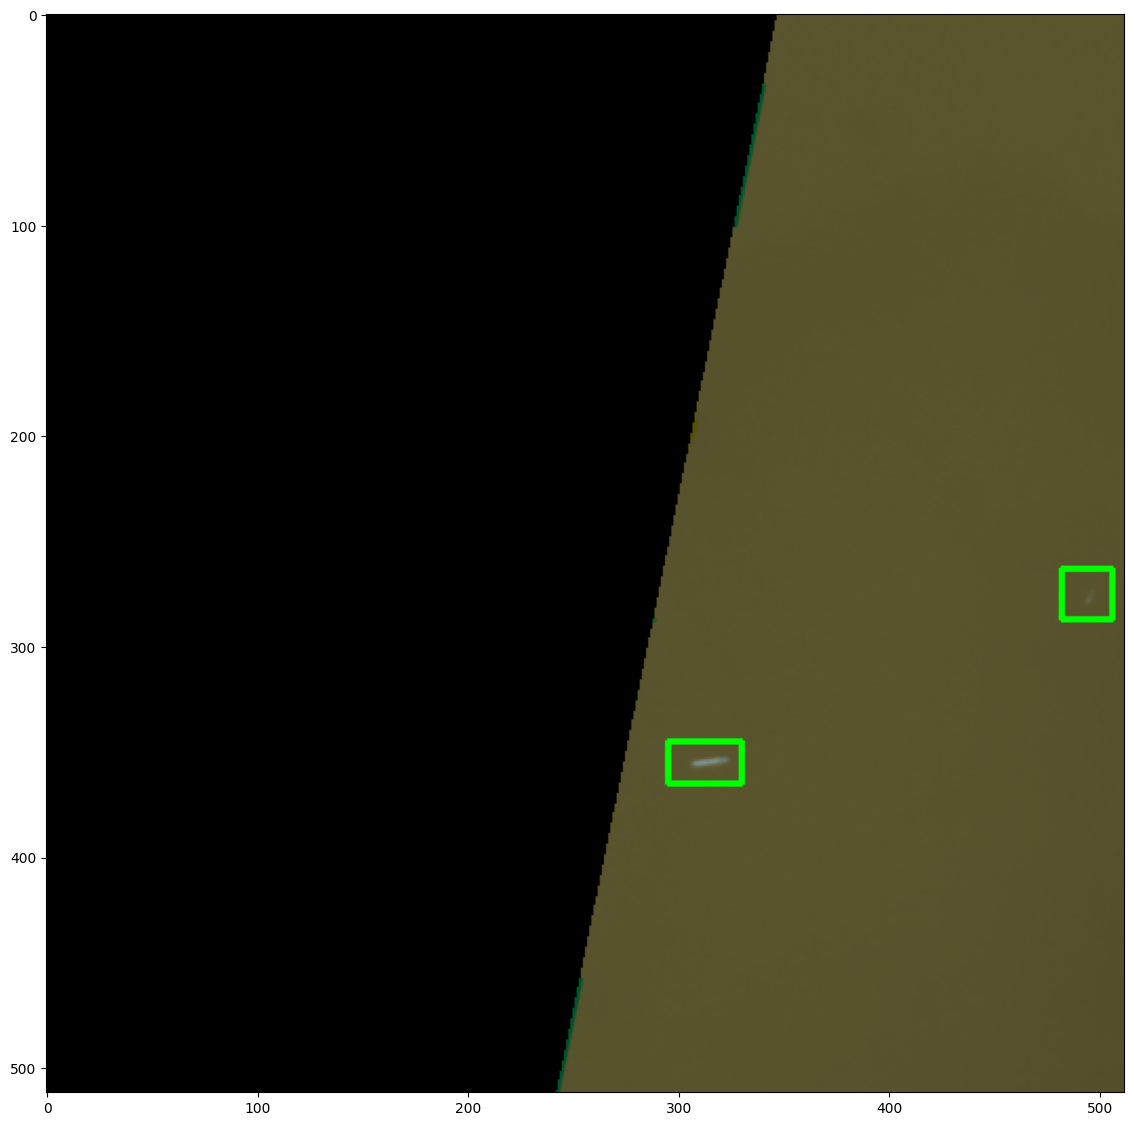

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,14))
plt.imshow(tmps_[4])